# Logistic Regression with Python


In [20]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

## Downloading Data

In [21]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [4]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### converting churn column to int

In [26]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


### converting the Pandas data frame to a Numpy array:

In [28]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

print(X[0:5],'\n')
print(y[0:5])

[[ 11.  33.   7. 136.   5.   5.   0.]
 [ 33.  33.  12.  33.   2.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.]
 [  7.  35.  14.  80.   2.  15.   0.]] 

[1 1 0 0 0]


### Normalizing Data
- we should do Normalizing

In [29]:
from sklearn import preprocessing
fitting = preprocessing.StandardScaler().fit(X)
X = fitting.transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Training Model
- [LogisticRegression link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- C: Regularization is a technique used to solve the overfitting problem of machine learning models. Smaller values specify stronger regularization
- solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’



In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Predicting


In [131]:
yhat = LR.predict(X_test)
print(yhat[0:20])
print(y_test[0:20])

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1]


In [132]:
# the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:20]

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48]])

<h2 id="evaluation">Evaluation</h2>


- jaccard 

In [134]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = 0) # 1 or 0 - binary

0.7058823529411765

- confusion matrix

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False, # because we had done normalizing at previous cells
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


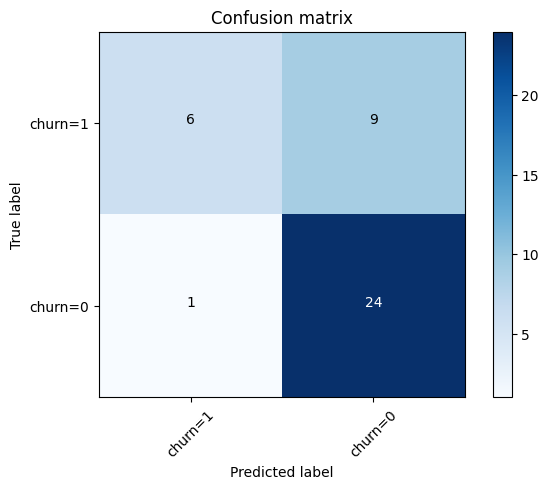

In [123]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

- **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)


In [129]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



- log loss


In [130]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185